In [37]:
import pandas as pd
import numpy as np
#import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('breast cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [7]:
list = ['radius_mean','texture_mean','perimeter_mean','area_mean']

In [16]:
X = df[list].values
#X.head()
X[0:5]

array([[  17.99,   10.38,  122.8 , 1001.  ],
       [  20.57,   17.77,  132.9 , 1326.  ],
       [  19.69,   21.25,  130.  , 1203.  ],
       [  11.42,   20.38,   77.58,  386.1 ],
       [  20.29,   14.34,  135.1 , 1297.  ]])

In [15]:
Y = df['diagnosis'].values
Y[0:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [17]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### 357 Benign, 212 Malignant

## Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928]])

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (455, 4) (455,)
Test set: (114, 4) (114,)


## Classification

### K nearest neighbor (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

##### Training


In [21]:
# lets take k = 5 at first. 5 is also the default value of k

k = 5
#Initialize the classifier  
clf = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##### Predicting

In [22]:
yhat = clf.predict(X_test)
yhat[0:5]

array(['B', 'B', 'M', 'M', 'M'], dtype=object)

##### Accuracy Measure

In [26]:
from sklearn import metrics

Confusion Matrix

In [35]:
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted)
    sn.heatmap(cm,annot=True, fmt='.2f',
              xticklabels = ["Benign","Malignant"],
              yticklabels = ["Benign","Malignant"])
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

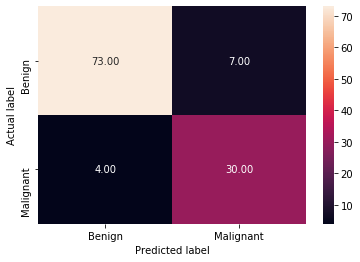

In [38]:
draw_cm(Y_test,yhat)

In [33]:
print(metrics.classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           B       0.95      0.91      0.93        80
           M       0.81      0.88      0.85        34

    accuracy                           0.90       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.91      0.90      0.90       114



The recall value for both the Beningn and Malignant tumors are very good,i.e., the model is very good at identifying the true natue of the tumors.